In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,6
import warnings
warnings.filterwarnings('ignore')
seq_col_brew = sns.color_palette("YlGnBu_r", 4)
sns.set_palette(seq_col_brew)

In [9]:
train = pd.read_csv('train.tsv', sep='\t', usecols=['item_condition_id', 'shipping', 'brand_name', 'price', 'category_name'])
test = pd.read_csv('test.tsv', sep='\t')

In [10]:
train.head()

,item_condition_id,category_name,brand_name,price,shipping
0,3,Men/Tops/T-shirts,NaN,10.0,1
1,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0
2,1,Women/Tops & Blouses/Blouse,Target,10.0,1
3,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1
4,1,Women/Jewelry/Necklaces,NaN,44.0,0


In [11]:
def preprocessing(df):
    x = [['item_condition_id', 'shipping', 'brand_name', 'category_name']]
    if 'price' in df.columns:
        y = df['price']
    else:
        y = None
    return x,y

In [15]:
x, y = preprocessing(train)

In [16]:
y.head()

0    10.0
1    52.0
2    10.0
3    35.0
4    44.0
Name: price, dtype: float64

In [141]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 5 columns):
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 230.5 MB


In [142]:
x.isnull().sum()

item_condition_id         0
shipping                  0
brand_name           632682
category_name          6327
dtype: int64

In [143]:
x.shape

(1482535, 4)

In [144]:
x['brand_name'].fillna('Other', inplace=True)

In [145]:
x.isnull().sum()

item_condition_id       0
shipping                0
brand_name              0
category_name        6327
dtype: int64

In [146]:
dataset[dataset['category_name'].isnull()]

,item_condition_id,category_name,brand_name,price,shipping
122,3,NaN,NaN,59.0,0
155,3,NaN,NaN,10.0,1
258,5,NaN,NaN,14.0,0
984,4,NaN,Michael Kors,18.0,0
1185,3,NaN,Nickelodeon,9.0,0
1274,2,NaN,Urban Outfitters,15.0,0
1320,2,NaN,PetSafe,12.0,0
1419,1,NaN,NaN,34.0,0
1491,3,NaN,NaN,3.0,1
1521,2,NaN,NaN,3.0,1


In [147]:
x.isnull().sum()

item_condition_id       0
shipping                0
brand_name              0
category_name        6327
dtype: int64

In [148]:
x.shape

(1482535, 4)

In [149]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.80, random_state = 0)

In [150]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296507 entries, 692506 to 305711
Data columns (total 4 columns):
item_condition_id    296507 non-null int64
shipping             296507 non-null int64
brand_name           296507 non-null object
category_name        295244 non-null object
dtypes: int64(2), object(2)
memory usage: 11.3+ MB


In [151]:
x_train.shape

(296507, 4)

In [152]:
x_train.isnull().sum()

item_condition_id       0
shipping                0
brand_name              0
category_name        1263
dtype: int64

In [153]:
x_train.head()

,item_condition_id,shipping,brand_name,category_name
692506,3,0,ALEX AND ANI,Women/Jewelry/Bracelets
1040909,3,0,Other,Home/Kitchen & Dining/Coffee & Tea Accessories
1021522,2,0,LG,Electronics/Cell Phones & Accessories/Cell Pho...
327336,2,1,Other,Home/Home Décor/Decorative Pillows
684230,2,1,Other,Women/Coats & Jackets/Jean Jacket


## Data Analysis

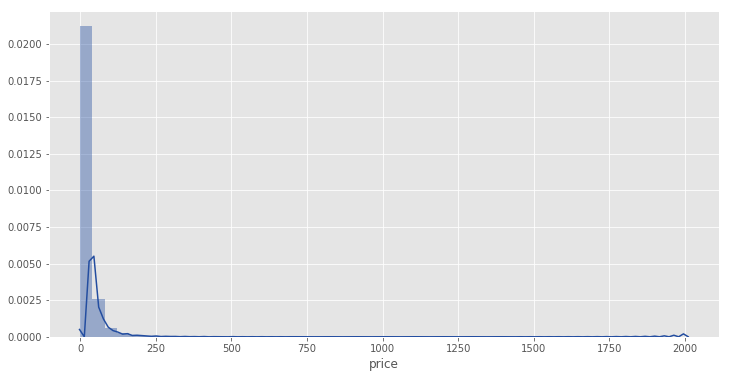

In [154]:
#To check Gaussian Distribution.
sns.distplot(y)

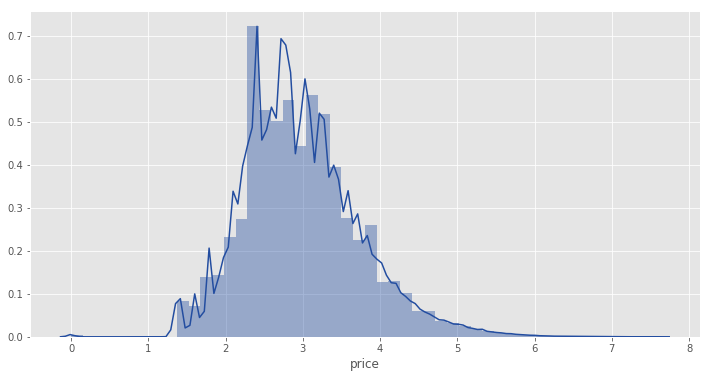

In [155]:
#Log distribution
sns.distplot(np.log(y + 1))

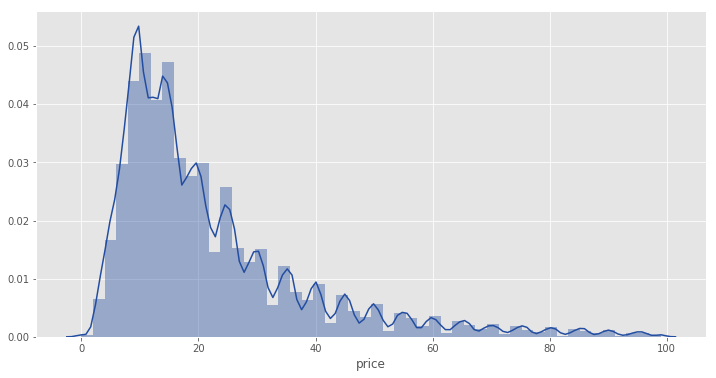

In [156]:
sns.distplot(y[y < 100])

In [157]:
y.mode()

0    10.0
dtype: float64

In [158]:
y.mean()

26.737516146330442

In [159]:
y.median()

17.0

In [160]:
#How do you know what a high standard deviation is? 
#https://www.researchgate.net/post/What_do_you_consider_a_good_standard_deviation
y.std()

38.586066313339806

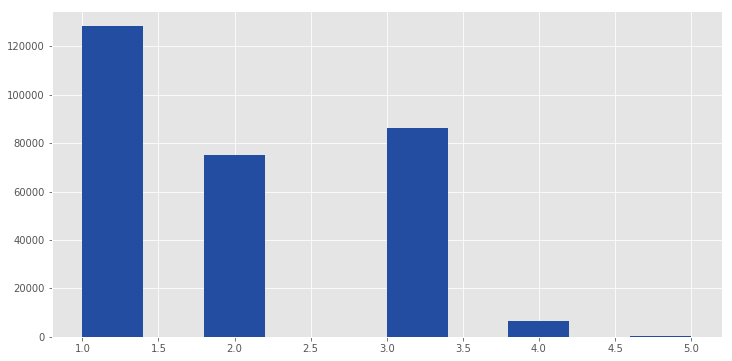

In [161]:
#Viewing the an independent variable and it's different distribution 
x_train.item_condition_id.hist()

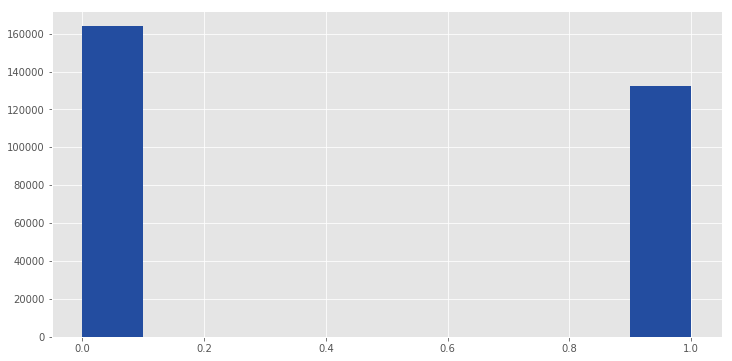

In [162]:
#1 if shipping fee is paid by seller and 0 by buyer
x_train.shipping.hist()

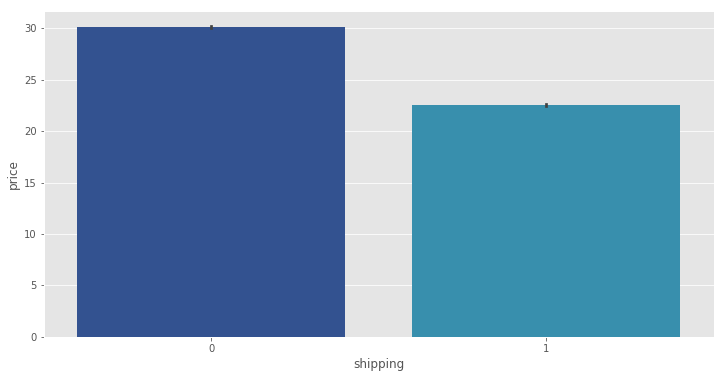

In [163]:
#The seller takes a hit by paying for the shipping him/herself
sns.barplot(x='shipping', y='price', data=dataset)

In [164]:
dataset.describe(include=['O']) 

,category_name,brand_name
count,1476208,849853
unique,1287,4809
top,"Women/Athletic Apparel/Pants, Tights, Leggings",PINK
freq,60177,54088


In [165]:
dataset.describe()

,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06
mean,1.907380e+00,2.673752e+01,4.472744e-01
std,9.031586e-01,3.858607e+01,4.972124e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+01,0.000000e+00
50%,2.000000e+00,1.700000e+01,0.000000e+00
75%,3.000000e+00,2.900000e+01,1.000000e+00
max,5.000000e+00,2.009000e+03,1.000000e+00


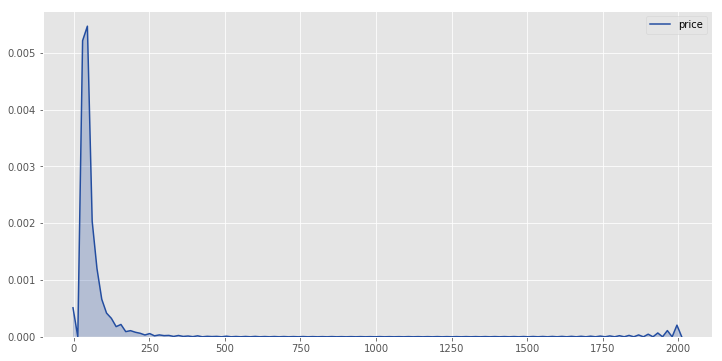

In [166]:
sns.kdeplot(data=y, shade=True, bw=.85)

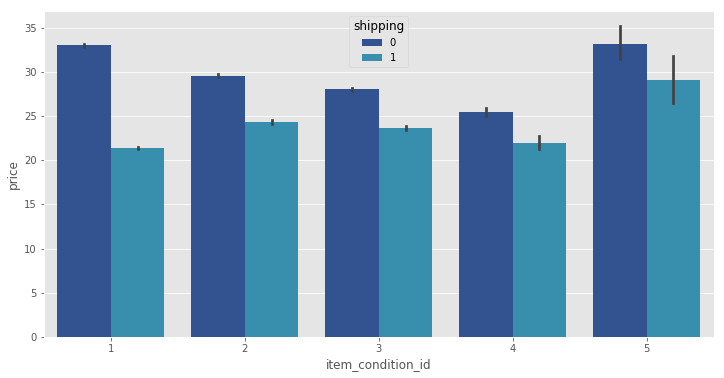

In [167]:
sns.barplot(x='item_condition_id', y='price', hue='shipping', data=dataset)

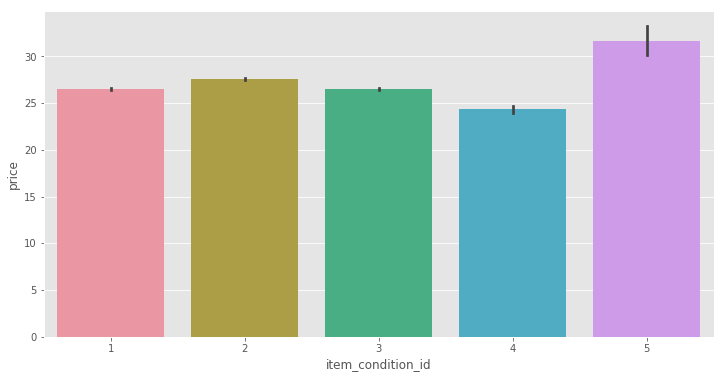

In [168]:
sns.barplot(x='item_condition_id', y='price', data=dataset)

## Summary Data Analysis
1. There are outliers in the price data (could I apply feature scaling without having the y?)
2. 5 condition id is more expensive - meaning 5 is higher quality
3. Majourity of items are either in 1 or 2 condition

In [169]:
x_train["brand_name"].value_counts()

Other                   126351
Nike                     10804
PINK                     10602
Victoria's Secret         9533
LuLaRoe                   6155
Apple                     3437
FOREVER 21                3070
Nintendo                  3029
Lululemon                 2922
Michael Kors              2753
American Eagle            2673
Rae Dunn                  2504
Sephora                   2422
Disney                    2112
Coach                     2084
Adidas                    2081
Bath & Body Works         2053
Funko                     1882
Under Armour              1704
Sony                      1639
Old Navy                  1508
Hollister                 1411
Urban Decay               1273
Carter's                  1254
The North Face            1219
Independent               1187
Brandy Melville           1171
Xbox                      1145
Too Faced                 1145
Kate Spade                1078
                         ...  
Kanebo                       1
Jonathan

In [170]:
x_train.isnull().sum()

item_condition_id       0
shipping                0
brand_name              0
category_name        1263
dtype: int64

In [171]:
#Splitting the categories into sub categories

In [172]:
category_columns = ['Top_Level_Category'] + ['Second_Level_Category'] + ['Third_Level_Category']

In [173]:
category_columns

['Top_Level_Category', 'Second_Level_Category', 'Third_Level_Category']

In [174]:
x_train.head()

,item_condition_id,shipping,brand_name,category_name
692506,3,0,ALEX AND ANI,Women/Jewelry/Bracelets
1040909,3,0,Other,Home/Kitchen & Dining/Coffee & Tea Accessories
1021522,2,0,LG,Electronics/Cell Phones & Accessories/Cell Pho...
327336,2,1,Other,Home/Home Décor/Decorative Pillows
684230,2,1,Other,Women/Coats & Jackets/Jean Jacket


In [175]:
new_categories = x_train['category_name'].str.extract('(\w*)\/(\w*)\/(\w*)', expand=True)

In [176]:
new_categories.columns

Int64Index([0, 1, 2], dtype='int64')

In [177]:
new_categories.columns = category_columns

In [178]:
x_train = pd.concat([x_train, new_categories], axis=1)

In [179]:
x_train.head()

,item_condition_id,shipping,brand_name,category_name,Top_Level_Category,Second_Level_Category,Third_Level_Category
692506,3,0,ALEX AND ANI,Women/Jewelry/Bracelets,Women,Jewelry,Bracelets
1040909,3,0,Other,Home/Kitchen & Dining/Coffee & Tea Accessories,NaN,NaN,NaN
1021522,2,0,LG,Electronics/Cell Phones & Accessories/Cell Pho...,NaN,NaN,NaN
327336,2,1,Other,Home/Home Décor/Decorative Pillows,NaN,NaN,NaN
684230,2,1,Other,Women/Coats & Jackets/Jean Jacket,NaN,NaN,NaN


In [180]:
columns = ['Top_Level_Category', 'Second_Level_Category', 'Third_Level_Category']

In [181]:
x_train.isnull().sum()

item_condition_id             0
shipping                      0
brand_name                    0
category_name              1263
Top_Level_Category       152637
Second_Level_Category    152637
Third_Level_Category     152637
dtype: int64

In [182]:
new_categories.isnull().sum()

Top_Level_Category       152637
Second_Level_Category    152637
Third_Level_Category     152637
dtype: int64

In [183]:
for col in columns:
   x_train[col].fillna('Other', inplace=True)

In [184]:
x_train.head()

,item_condition_id,shipping,brand_name,category_name,Top_Level_Category,Second_Level_Category,Third_Level_Category
692506,3,0,ALEX AND ANI,Women/Jewelry/Bracelets,Women,Jewelry,Bracelets
1040909,3,0,Other,Home/Kitchen & Dining/Coffee & Tea Accessories,Other,Other,Other
1021522,2,0,LG,Electronics/Cell Phones & Accessories/Cell Pho...,Other,Other,Other
327336,2,1,Other,Home/Home Décor/Decorative Pillows,Other,Other,Other
684230,2,1,Other,Women/Coats & Jackets/Jean Jacket,Other,Other,Other


In [193]:
x_train = x_train.drop('category_name', axis=1)

ValueError: labels ['category_name'] not contained in axis

In [188]:
x_train['brand_name'] = x_train['brand_name'].astype('category').cat.codes
x_train['Top_Level_Category'] = x_train['Top_Level_Category'].astype('category').cat.codes
x_train['Second_Level_Category'] = x_train['Second_Level_Category'].astype('category').cat.codes
x_train['Third_Level_Category'] = x_train['Third_Level_Category'].astype('category').cat.codes

In [194]:
x_train.head()

,item_condition_id,shipping,brand_name,Top_Level_Category,Second_Level_Category,Third_Level_Category
692506,3,0,32,11,31,59
1040909,3,0,1956,8,40,261
1021522,2,0,1458,8,40,261
327336,2,1,1956,8,40,261
684230,2,1,1956,8,40,261


In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [210]:
linreg = LinearRegression(n_jobs=-1)
cv_scores = cross_val_score(linreg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(cv_scores.mean(), cv_scores.std())

-1524.17724864 137.307013636


In [229]:
pred = np.ones((submission.shape[0]))

In [230]:
pred

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [231]:
pred * y_train.mean()

array([ 26.84365293,  26.84365293,  26.84365293, ...,  26.84365293,
        26.84365293,  26.84365293])

In [232]:
pred = pred * y_train.mean()

In [235]:
submission.shape

(693359, 2)

In [236]:
submission = pd.read_csv('sample_submission.csv')

In [237]:
submission['price'] = pred

In [238]:
submission.to_csv('sample_submission.csv', index=False)